### 1. 简单线性回归概述
假设对于一系列数据，我们找到了最佳拟合方程$y=ax+b$，则对于每个样本点$x^{(i)}$来说，预测值为：  
$\hat y = ax^{(i)}+b$
其真值为$y^{(i)}$，我们希望这两者的差距尽可能的小：
$(y^{(i)} - \hat y^{(i)})^2$  
对于所有样本来说，我们就是希望以下的值最小：  
$\sum_{i=1}^m(y^{(i)} - \hat y^{(i)})^2$
![](https://www.machinelearningmindset.com/wp-content/uploads/2020/03/linearregline-768x526.png)

我们的目标其实就是寻找到a和b，使得$\sum_{i=1}^m(y^{(i)} - ax^{(i)} - b)^2$ 最小。这是一个典型的最小二乘法问题，最小化误差的平方。

几乎所有的参数学习算法的套路都是通过最优化损失函数或者效用函数，获得机器学习的模型。

最小二乘法可以求解得到a和b的值：  

\begin{equation}
a = \frac{\sum_{i=1}^m \left(x^\left(i\right) - \bar x\right)\left(y^\left(i\right) - \bar y\right)}{\sum_{i=1}^m \left(x^\left(i\right) - \bar x\right)^2}
\end{equation}

\begin{equation}
b = \bar y - a\bar x
\end{equation}

以下是对b的求解过程：

\begin{equation}
\frac{\partial J\left(a, b\right)}{\partial b} =  \sum_{i=1}^m -2\left(y^i-ax^i-b\right)  
\end{equation}

令其等于0：
\begin{equation}
 \sum_{i=1}^m -2\left(y^i-ax^i-b\right) = 0 
\end{equation}

则：
\begin{equation}
\begin{aligned}
bm &= \sum_{i=1}^m y^i - \sum_{i=1}^m a x^i \\
m &= \bar y -  a\bar x
\end{aligned}
\end{equation}

以下是对a的求解过程：

\begin{equation}
\begin{aligned}
\frac{\partial J\left(a, b\right)}{\partial a} &=  \sum_{i=1}^m 2\left(y^i-ax^i-b\right)\left(-x^i\right) \\
&=2 \sum_{i=1}^m \left(y^i - ax^i - \bar y + a\bar x\right)\left(-x^i\right) \\
&= 2 \sum_{i=1}^m \left(x^iy^i - x^i\bar y - a\left((x^i)^2 - \bar x x\right)\right)
\end{aligned}
\end{equation}

令其等于0：

\begin{equation}
\begin{aligned}
a &= \frac{\sum_{i=1}^m\left(x^iy^i - x^i\bar y\right)}{\sum_{i=1}^m \left((x^i)^2 - \bar x x\right)} \\
&=\frac{\sum_{i=1}^m\left(x^iy^i - x^i\bar y + \bar x \bar y - \bar x y^i\right)}{\sum_{i=1}^m \left((x^i)^2 - \bar x x + \bar x^2 - \bar x x^i\right)} \\
&=\frac{\sum_{i=1}^m\left(\left(x^i - \bar x\right)\left(y^i - \bar y\right)\right)}{\sum_{i=1}^m \left(x^i - \bar x\right)^2}
\end{aligned}
\end{equation}


### 2. 简单线性回归的实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt

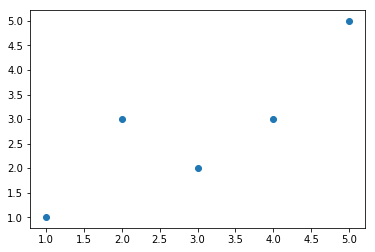

In [2]:
# 构造简单数据
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 2, 3, 5])

plt.scatter(x, y)
plt.show()

In [16]:
# 直接求出线性回归的系数a, b
x_mean = np.mean(x)
y_mean = np.mean(y)

a1, a2 = 0, 0
for i in range(len(x)):
    a1 += (x[i] - x_mean) * (y[i] - y_mean)
    a2 += (x[i] - x_mean) ** 2

a = a1/a2

b = np.mean(y) - a * x_mean

In [17]:
print(a, b)

0.8 0.39999999999999947


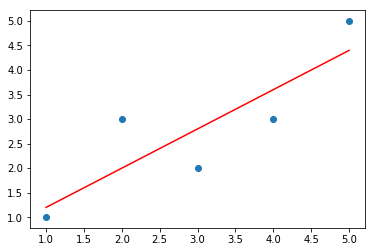

In [24]:
y_hat = x * a + b
plt.scatter(x, y)
plt.plot(x, y_hat, color = 'r')
plt.show()

In [19]:
# 将其封装为class， 与sklearn相似

class SimpleLinearRegression:
    # 初始化
    def __init__(self):
        self.a_ = None
        self.b_ = None
    
    def fit(self, x_train, y_train): # x_train是一维向量
        assert x_train.ndim == 1, "Simple Linear Regression must be 1D array!"
        assert len(x_train) == len(y_train), "The size of x_train and y_train must be same!"
        
        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)
        
        a1, a2 = 0, 0
        for x,y in zip(x_train, y_train):
            a1 += (x - x_mean) * (y - y_mean)
            a2 += (x - x_mean) ** 2
        
        self.a_ = a1 / a2
        self.b_ = y_mean - self.a_ * x_mean
        
        return self
        
    def predict(self, x_predict):
        assert x_predict.ndim == 1, "Simple Linear Regression must be 1D array!"
        assert self.a_ != None and self.b_ != None, "You must fit before predict!"
        
        return np.array([self._predict(x) for x in x_predict])
    
    def _predict(self, x_single):
        return x_single * self.a_ + self.b_
    
    def __repr__(self):
        return "SimpleLinearRegression"

In [20]:
# 调用
reg1 = SimpleLinearRegression()
reg1.fit(x, y)

SimpleLinearRegression

In [21]:
reg1.predict(np.array([6]))

array([5.2])

In [23]:
print(reg1.a_)
print(reg1.b_)

0.8
0.39999999999999947


### 3. 向量化运算

In [31]:
# 将原来的class计算方法修改为向量化运算

class SimpleLinearRegression2:
    # 初始化
    def __init__(self):
        self.a_ = None
        self.b_ = None
    
    def fit(self, x_train, y_train): # x_train是一维向量
        assert x_train.ndim == 1, "Simple Linear Regression must be 1D array!"
        assert len(x_train) == len(y_train), "The size of x_train and y_train must be same!"
        
        
        a1 = (x_train - x_mean).dot(y_train - y_mean)
        a2 = (x_train - x_mean).dot(x_train - x_mean)
        self.a_ = a1/ a2
        
        self.b_ = y_mean - self.a_ * x_mean
        
        return self
        
    def predict(self, x_predict):
        assert x_predict.ndim == 1, "Simple Linear Regression must be 1D array!"
        assert self.a_ != None and self.b_ != None, "You must fit before predict!"
        
        return np.array([self._predict(x) for x in x_predict])
    
    def _predict(self, x_single):
        return x_single * self.a_ + self.b_
    
    def __repr__(self):
        return "SimpleLinearRegression2"

In [32]:
reg2 = SimpleLinearRegression2()
reg2.fit(x, y)

SimpleLinearRegression2

In [33]:
print(reg1.a_)
print(reg1.b_)

0.8
0.39999999999999947


In [35]:
# 构造大数据测试时间
big_x = np.random.random(size = 1000000)
big_y = big_x * 2. + 3. + np.random.normal(0, 1, size = 1000000)

In [41]:
%%time
reg1.fit(big_x, big_y)

CPU times: user 1.72 s, sys: 17.6 ms, total: 1.74 s
Wall time: 2 s


SimpleLinearRegression

In [42]:
%%time
reg2.fit(big_x, big_y)

CPU times: user 17.8 ms, sys: 9.47 ms, total: 27.3 ms
Wall time: 19.4 ms


SimpleLinearRegression2

由此可见，在速度方面向量化会快很多。

### 4. 衡量线性回归的指标 

#### 4.1 MSE, RMSE, MAE

1) 均方误差，即Mean Square Error (MSE)，表达式为：  $\frac{1}{m}\sum_{i=1}^{m}(y_{test}^i - \hat y_{test}^i)^2$

2) 均方根误差，即Root Mean Square Error (RMSE)，是在均方误差的基础上开根号，表达式为：  
$\sqrt{\frac{1}{m}\sum_{i=1}^{m}(y_{test}^i - \hat y_{test}^i)^2} = \sqrt{MSE_{test}}$

3) 平均绝对误差，即Mean Absolute Error (MAE)，表达式为：
$\frac{1}{m}\sum_{i=1}^{m}|y_{test}^i - \hat y_{test}^i|$

In [43]:
from sklearn import datasets

In [51]:
boston = datasets.load_boston()
# print(boston.DESCR)
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [52]:
x = boston.data[:, 5] # 只用了其中房间数量一个特征
y = boston.target

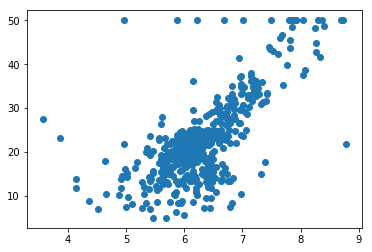

In [53]:
plt.scatter(x,y)
plt.show()

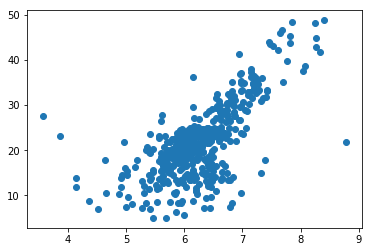

In [56]:
x = x[y<50,] # 去掉最上面的离散点
y = y[y<50,]
plt.scatter(x,y)
plt.show()

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [64]:
reg = SimpleLinearRegression2()
reg.fit(x_train, y_train)

SimpleLinearRegression2

In [65]:
print(reg.a_, reg.b_)

5.956184824576212 -15.068554473728636


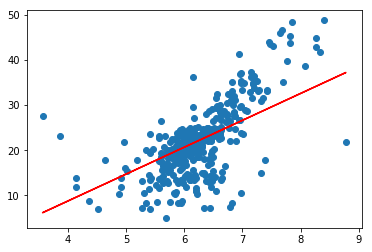

In [68]:
plt.scatter(x_train,y_train)
plt.plot(x_train, reg.predict(x_train), color = 'r')
plt.show()

In [69]:
y_pred = reg.predict(x_test)

In [73]:
# MSE
mse = np.sum((y_pred - y_test)**2) / len(y_pred)
print('MSE = {}'.format(mse))

# RMSE
rmse = np.sqrt(mse)
print('RMSE = {}'.format(rmse))

# MAE
mae = np.sum(np.absolute(y_pred - y_test)) / len(y_pred)
print('MAE = {}'.format(mae))

MSE = 31.944110213415723
RMSE = 5.651912084721039
MAE = 4.140222676263924


In [75]:
# sklearn中的MSE与MAE
# 并没有RMSE，自己开平方即可

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [77]:
print(mean_squared_error(y_pred, y_test))
print(mean_absolute_error(y_pred, y_test))

31.944110213415723
4.140222676263924


RMSE比MAE是要大一些的。

#### 4.2 R squared

RMSE与MAE有个局限性，就是对于分类的种类不同的情况很难去比较谁的效果好，比如预测学生的成绩和预测房价，得到的RMSE/MAE是并不能比较的。

但是$R^2$是可以解决这个问题的，不同分类种类可以互相比较。

\begin{equation}
R^2 = 1 - \frac{SS_{residual}}{SS_{total}} 
\end{equation}

$SS_{residual}$全称是Residual sum of squares；$SS_{total}$是Total Sum of Square。

\begin{equation}
R^2 = 1 - \frac{\sum_{i=1}^m(\hat y^i - y^i)^2}{\sum_{i=1}^m(\bar y^i - y^i)^2} 
\end{equation}

其实$R^2$也可以进一步写为：

\begin{equation}
R^2 = 1 - \frac{MSE(\hat y, y)}{Var(y)} 
\end{equation}

分子可以理解为使用这个模型产生的错误，分母可以理解为使用$y = \bar y$时产生的错误（Baseline Model）。

因此我们可以得到以下结论：  
1). $R^2$的取值小于等于1；  
2). $R^2$越大越好，当模型没有任何错误的时候，其值为1；  
3). 当模型为Baseline model时，其值为0；  
4). 如果$R^2$<0时，说明这个模型甚至还不如Baseline model，很有可能该数据不存在任何线性关系。

In [80]:
# 计算R^2

1 - mean_squared_error(y_pred, y_test) / np.var(y_test)

0.4300935416170455

In [82]:
# sklearn中接口
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4300935416170455

### 5. 多元线性回归

实际上的数据中，更可能是有很多个特征值的，如下图所示。
![](http://img.wandouip.com/crawler/article/2019327/2629e1c8ae4d7315c34cfc00051718fb)

类似于简单线性回归，多元线性回归的目标是：  
找到一系列$\theta_0, \theta_1, \theta_2, \cdots, \theta_n$， 使得$\sum_{i=1}^m(\hat y^i - y^i)^2$尽可能的小。

我们可以使得一个$\theta$为 (其中$\theta_0$就是我们要找的截距，而剩下的就是斜率)：

\begin{equation}
\theta = (\theta_0, \theta_1, \cdots, \theta_n)^T
\end{equation}

$\hat y$也可以写成（为$\theta_0$增加一位$X_0$，$X_0 \equiv 1$）：

\begin{equation}
\hat y = \theta_0X_0^i, \theta_1X_1^i, \cdots, \theta_nX_n^i, X_0 \equiv 1
\end{equation}

$X^i$写为向量形式为：

\begin{equation}
X^i = (X_0^i, X_1^i, X_2^i, \cdots, X_n^i)
\end{equation}

这样$\hat y$就可以简写为: $\hat y = X^i \cdot \theta$

我们的目标也可以进一步写为：
$(y - X_b \cdot \theta)(y - X_b \cdot \theta)$

$\theta$的正规方程解为:  
$\theta = (X_b^TX_b)^{-1}X_b^Ty$

#### 5.1 多元线性回归的实现

In [108]:
class Linear_Regression:
    
    def __init__(self):
        self.coef_ = None
        self.interception_ = None
        self._theta = None
    
    def fit_normal(self, X_train, y_train):
        assert X_train.shape[0] == y_train.shape[0], "The size of X_train and y_train must be same!"
        
        X_b = np.hstack([np.ones(shape=(len(X_train), 1)), X_train])
        self._theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
        self.interception_ = self._theta[0]
        self.coef_ = self._theta[1:]
        
        return self
    
    def predict(self, X_test):
        assert self.interception_ is not None and self.coef_ is not None, \
        "You must fit before predict!"
        assert len(self.coef_) == X_test.shape[1], \
        "The feature number of X_predict must be the same with X_train!"
        
        X_b = np.hstack([np.ones(shape=(len(X_test), 1)), X_test])
        return X_b.dot(self._theta)
    
    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return 1 - mean_squared_error(y_pred, y_test) / np.var(y_test)
        
    def __repr__(self):
        return "LinearRegression()"
    

In [86]:
X = boston.data
y = boston.target
X = X[y<50] # 去掉最上面的离散点
y = y[y<50]

In [87]:
X.shape

(490, 13)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 666)

In [110]:
reg = Linear_Regression()
reg.fit_normal(X_train, y_train)

LinearRegression()

In [111]:
reg.coef_

array([-1.15625837e-01,  3.13179564e-02, -4.35662825e-02, -9.73281610e-02,
       -1.09500653e+01,  3.49898935e+00, -1.41780625e-02, -1.06249020e+00,
        2.46031503e-01, -1.23291876e-02, -8.79440522e-01,  8.31653623e-03,
       -3.98593455e-01])

In [112]:
reg.interception_

32.59756158866956

In [113]:
reg.score(X_test, y_test)

0.8009390227581031

#### 5.2 sklearn中的实现

In [114]:
from sklearn.linear_model import LinearRegression

In [117]:
lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [118]:
lin_reg.coef_

array([-1.15625837e-01,  3.13179564e-02, -4.35662825e-02, -9.73281610e-02,
       -1.09500653e+01,  3.49898935e+00, -1.41780625e-02, -1.06249020e+00,
        2.46031503e-01, -1.23291876e-02, -8.79440522e-01,  8.31653623e-03,
       -3.98593455e-01])

In [120]:
# 与上面自己实现的结果是相同的
lin_reg.intercept_

32.597561588699485

In [121]:
lin_reg.score(X_test, y_test)

0.8009390227581039